import libraries

In [1374]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

import data - csv file

In [1375]:
df = pd.read_csv('Social_Network_Ads.csv').set_index('User ID')

data structure

In [1376]:
df.shape

(400, 4)

In [1377]:
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15629885,Female,39,73000,0
15689425,Male,30,49000,0
15713144,Male,35,27000,0
15755018,Male,36,33000,0
15619465,Female,48,30000,1


In [1378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [1379]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [1380]:
df.describe(include=['O'])

,Gender
count,400
unique,2
top,Female
freq,204


data insight

<Axes: xlabel='Purchased'>

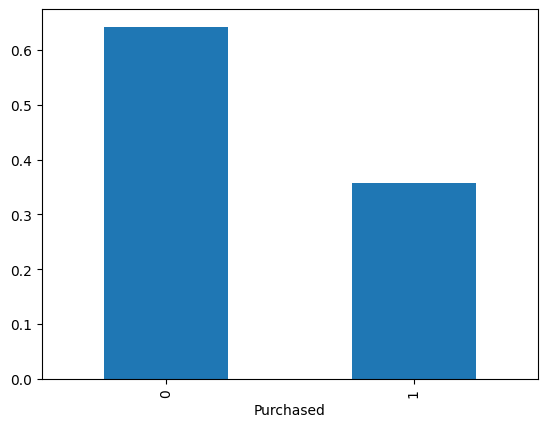

In [1381]:
df.Purchased.value_counts(normalize=True).plot.bar()

<Axes: ylabel='Frequency'>

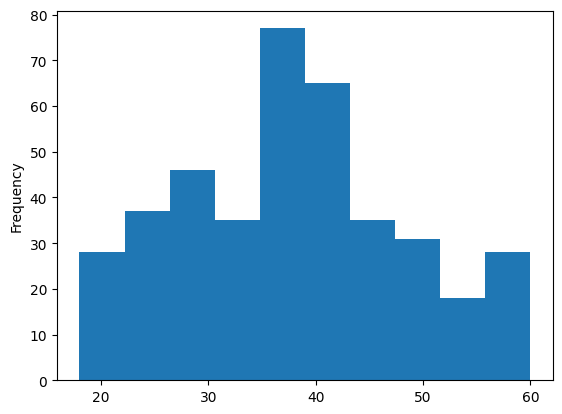

In [1382]:
df.Age.plot.hist()

<Axes: >

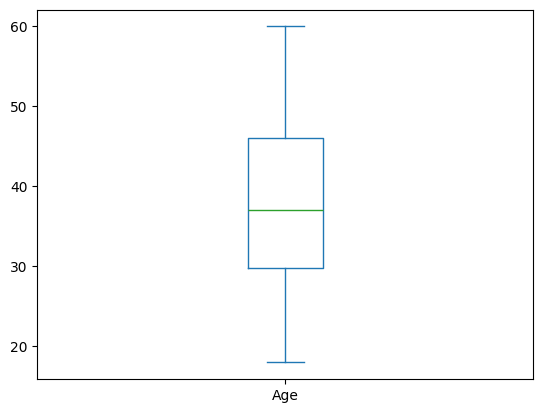

In [1383]:
df.Age.plot.box()

<Axes: ylabel='Frequency'>

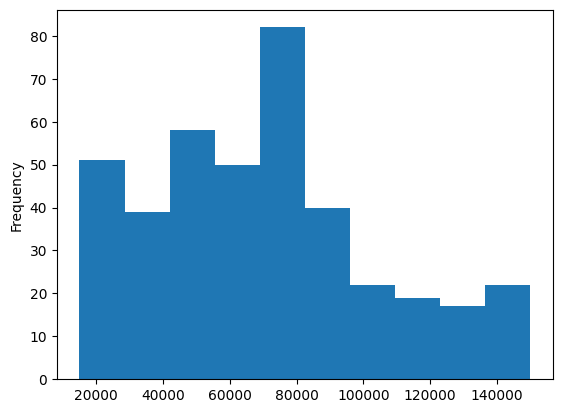

In [1384]:
df.EstimatedSalary.plot.hist()

<Axes: >

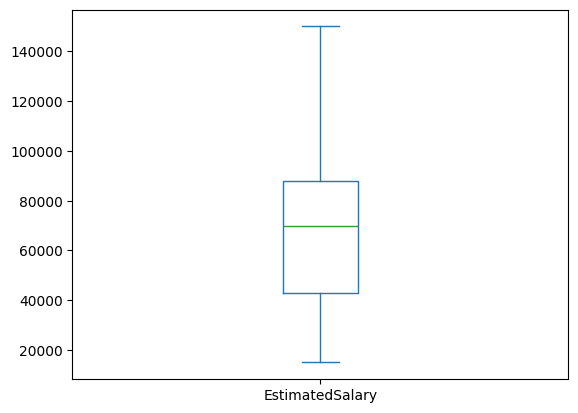

In [1385]:
df.EstimatedSalary.plot.box()

In [1386]:
df[['Age', 'EstimatedSalary']].corr()

,Age,EstimatedSalary
Age,1.000000,0.155238
EstimatedSalary,0.155238,1.000000


In [1387]:
df[['EstimatedSalary', 'Purchased']].corr()

,EstimatedSalary,Purchased
EstimatedSalary,1.000000,0.362083
Purchased,0.362083,1.000000


In [1388]:
pd.crosstab(df['Gender'], df['Purchased'], margins=True, normalize=True)

Purchased,0,1,All
Gender,,,
Female,0.3175,0.1925,0.51
Male,0.3250,0.1650,0.49
All,0.6425,0.3575,1.00


<Axes: ylabel='Purchased'>

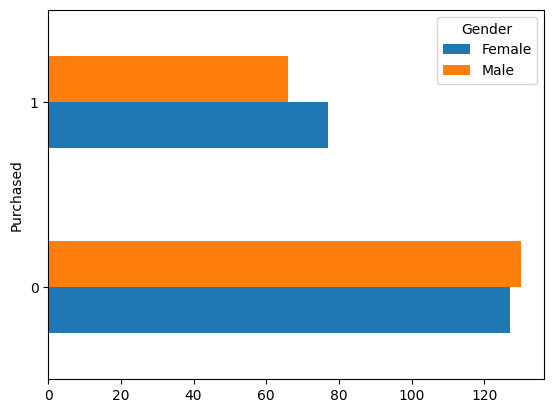

In [1389]:
df.groupby(['Gender', 'Purchased']).size().unstack().T.plot(kind='barh')

In [1390]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## KNN

In [1391]:
x = df[['Gender', 'Age', 'EstimatedSalary']]
x.loc[:,'Gender'] = x['Gender'].replace({'Male': 0,'Female': 1})
x = x.to_numpy()

y = df['Purchased']
y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, stratify=y, random_state=50)

/var/folders/v5/rlg6qc454l99syb4x9m7q2qc0000gp/T/ipykernel_16099/531144126.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.loc[:,'Gender'] = x['Gender'].replace({'Male': 0,'Female': 1})


In [1392]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [1393]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [1394]:
y_pred = knn.predict(x_test)

In [1395]:
y_test

/Users/anis/Developer/kmeans/.venv/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [1396]:
conf_mat = confusion_matrix(y_test, y_pred)

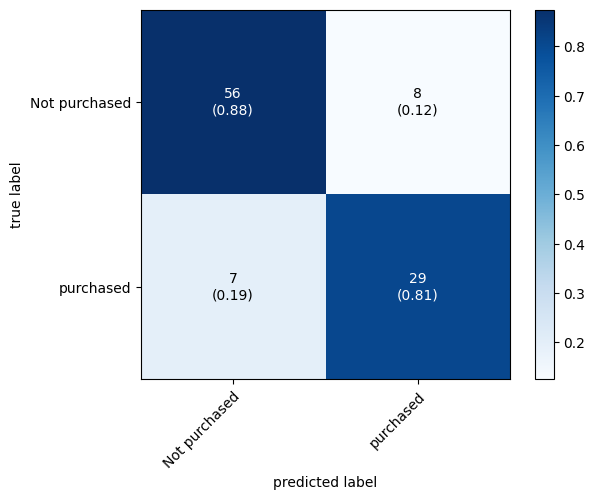

In [1397]:
class_names = ['Not purchased', 'purchased']

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

In [1398]:
knn.score(x_test, y_test)

0.85

In [1399]:
acc = accuracy_score(y_test, y_pred)
acc

0.85

decision tree

In [1400]:
tree = DecisionTreeClassifier(max_depth=4, random_state=50)
tree

DecisionTreeClassifier(max_depth=4, random_state=50)

In [1401]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=50)

In [1402]:
tree_y_pred = tree.predict(x_test)
tree_y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [1403]:
tree_conf_mat = confusion_matrix(y_test, tree_y_pred)
tree_conf_mat

array([[61,  3],
       [ 5, 31]])

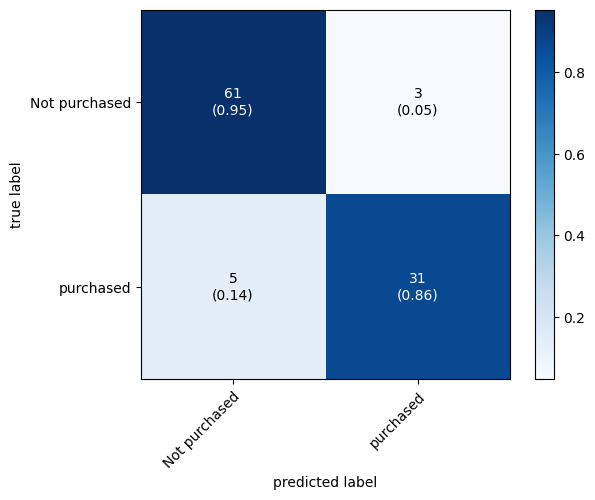

In [1404]:
fig, ax = plot_confusion_matrix(conf_mat=tree_conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names)

In [1405]:
tree.score(x_test, y_test)

0.92

In [1406]:
tree_acc = accuracy_score(y_test, tree_y_pred)
tree_acc

0.92

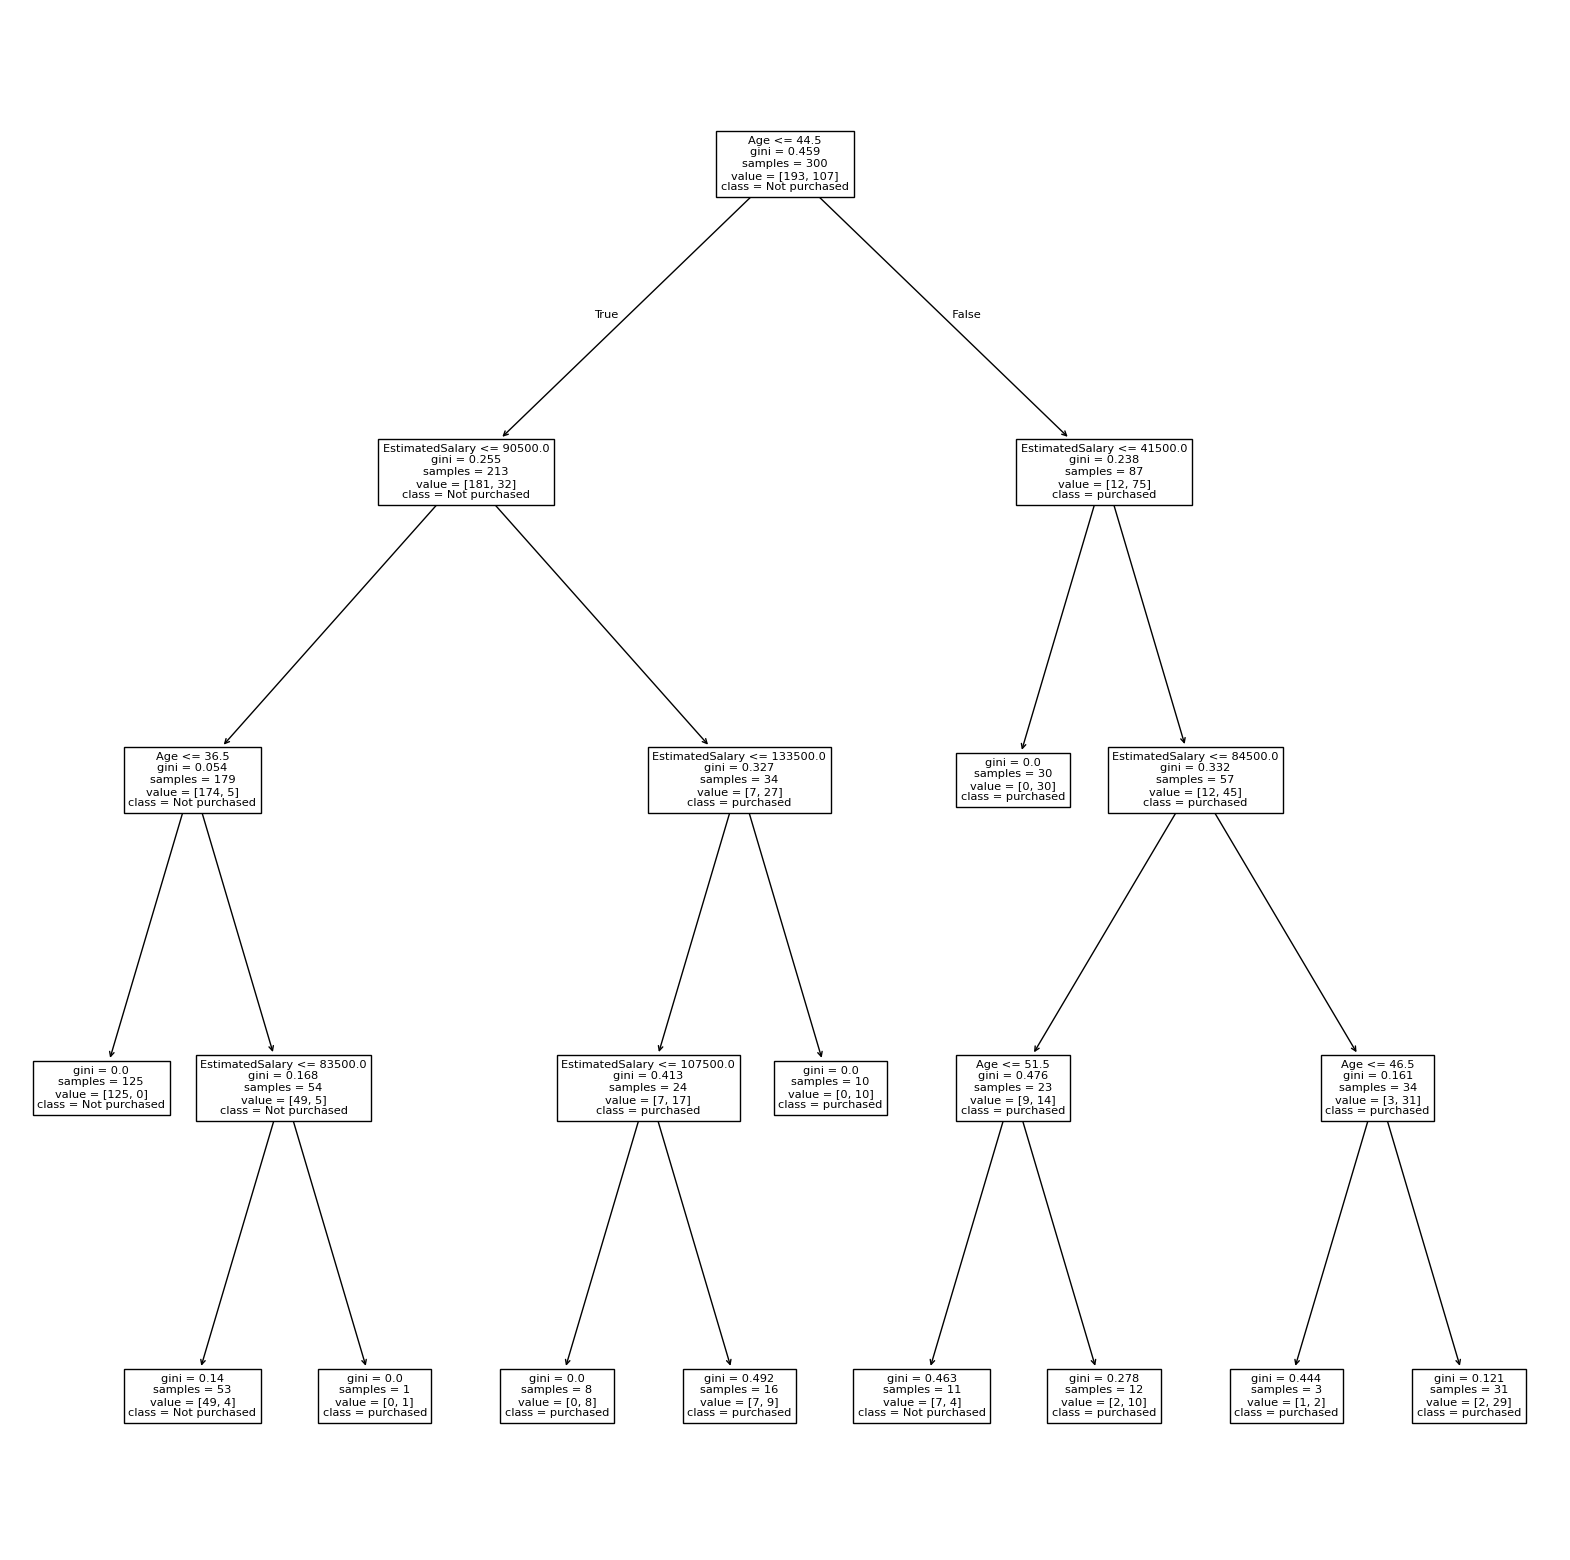

In [1407]:
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree, feature_names=df.columns[:-1], class_names=class_names)
plt.show()

In [1408]:
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=df.columns[:-1])
print(tree_rules)

|--- Age <= 44.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- EstimatedSalary <= 83500.00
|   |   |   |   |--- class: 0
|   |   |   |--- EstimatedSalary >  83500.00
|   |   |   |   |--- class: 1
|   |--- EstimatedSalary >  90500.00
|   |   |--- EstimatedSalary <= 133500.00
|   |   |   |--- EstimatedSalary <= 107500.00
|   |   |   |   |--- class: 1
|   |   |   |--- EstimatedSalary >  107500.00
|   |   |   |   |--- class: 1
|   |   |--- EstimatedSalary >  133500.00
|   |   |   |--- class: 1
|--- Age >  44.50
|   |--- EstimatedSalary <= 41500.00
|   |   |--- class: 1
|   |--- EstimatedSalary >  41500.00
|   |   |--- EstimatedSalary <= 84500.00
|   |   |   |--- Age <= 51.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  51.50
|   |   |   |   |--- class: 1
|   |   |--- EstimatedSalary >  84500.00
|   |   |   |--- Age <= 46.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  46.50
|   |   |   